In [1]:
git clone https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv git

SyntaxError: invalid syntax (<ipython-input-1-7d62e8f90a4a>, line 1)

In [3]:
git clone "https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv".git

SyntaxError: invalid syntax (<ipython-input-3-5b9499480e07>, line 1)

In [1]:
import pandas as pd
titanic = pd.read_csv("D:/Computer Sciences/Data Science/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
inputs = titanic.drop('PassengerId',axis ='columns')
inputs = inputs.drop('Name',axis ='columns')
inputs = inputs.drop('SibSp',axis ='columns')
inputs = inputs.drop('Parch',axis ='columns')
inputs = inputs.drop('Cabin',axis ='columns')
inputs = inputs.drop('Embarked',axis ='columns')
inputs = inputs.drop('Survived',axis ='columns')
inputs = inputs.drop('Ticket',axis ='columns')

In [3]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [4]:
target = titanic['Survived']

In [5]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder


In [7]:
le_sex = LabelEncoder()
inputs.Sex = le_sex.fit_transform(inputs['Sex'])
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
print(inputs.Age.mean())
inputs.head()


29.699117647058763


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [8]:
from sklearn import tree
from sklearn.model_selection import train_test_split


In [9]:
model = tree.DecisionTreeClassifier()


In [10]:

model.fit(inputs,target)

DecisionTreeClassifier()

In [11]:
model.score(inputs,target)

0.9797979797979798

In [12]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [13]:
print(X_train)

     Pclass  Sex   Age      Fare
15        2    0  55.0   16.0000
27        1    1  19.0  263.0000
754       2    0  48.0   65.0000
85        3    0  33.0   15.8500
307       1    0  17.0  108.9000
..      ...  ...   ...       ...
216       3    0  27.0    7.9250
397       2    1  46.0   26.0000
149       2    1  42.0   13.0000
509       3    1  26.0   56.4958
700       1    0  18.0  227.5250

[712 rows x 4 columns]


In [14]:
print(y_train)

15     1
27     0
754    1
85     1
307    1
      ..
216    1
397    0
149    0
509    1
700    1
Name: Survived, Length: 712, dtype: int64


In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
model.score(X_train,y_train)

0.9929775280898876

In [17]:
X_test.head()

,Pclass,Sex,Age,Fare
846,3,1,29.699118,69.5500
122,2,1,32.500000,30.0708
779,1,0,43.000000,211.3375
575,3,1,19.000000,14.5000
168,1,1,29.699118,25.9250


In [18]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [19]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [20]:
X_test.sort_values(by='Fare')

,Pclass,Sex,Age,Fare
271,3,1,25.000000,0.0000
815,1,1,29.699118,0.0000
732,2,1,29.699118,0.0000
413,2,1,29.699118,0.0000
129,3,1,45.000000,6.9750
...,...,...,...,...
609,1,0,40.000000,153.4625
779,1,0,43.000000,211.3375
527,1,1,29.699118,221.7792
299,1,0,50.000000,247.5208


In [50]:
print(model.predict([[1,0,38.0,71.2833]]))

[1]


In [51]:
from matplotlib import pyplot as plt

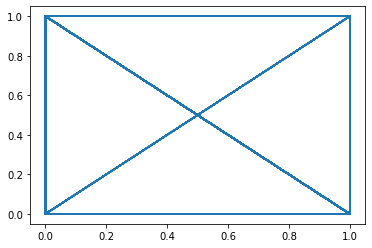

In [55]:
plt.plot(inputs.Sex,titanic.Survived)